In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

In [10]:
x1 = np.arange(0,99,1)
x2 = np.sin(2*np.pi*x1/100)

y1 = np.arange(0,99,1)
y2 = -np.sin(2*np.pi*x1/100)

t = np.arange(0,99,1)

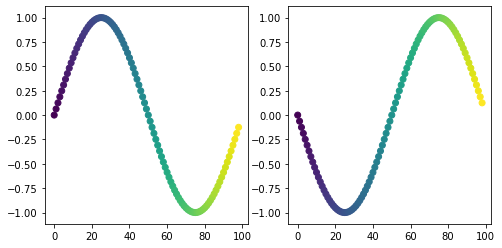

In [11]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(x1,x2,c=t)

plt.subplot(122)
plt.scatter(y1,y2,c=t)

In [12]:
#do CCA!

xdata = np.asarray([x1,x2]).T
ydata = np.asarray([y1,y2]).T

n_modes = 2 #modes to keep
cca = CCA(n_components=n_modes,max_iter = 100000)
U,V = cca.fit_transform(xdata,ydata)
A = cca.x_weights_
B = cca.y_weights_
F = np.cov(xdata.T)@A
G = np.cov(ydata.T)@B
r = [np.corrcoef(U[:,ii],V[:,ii]) for ii in range(n_modes)]

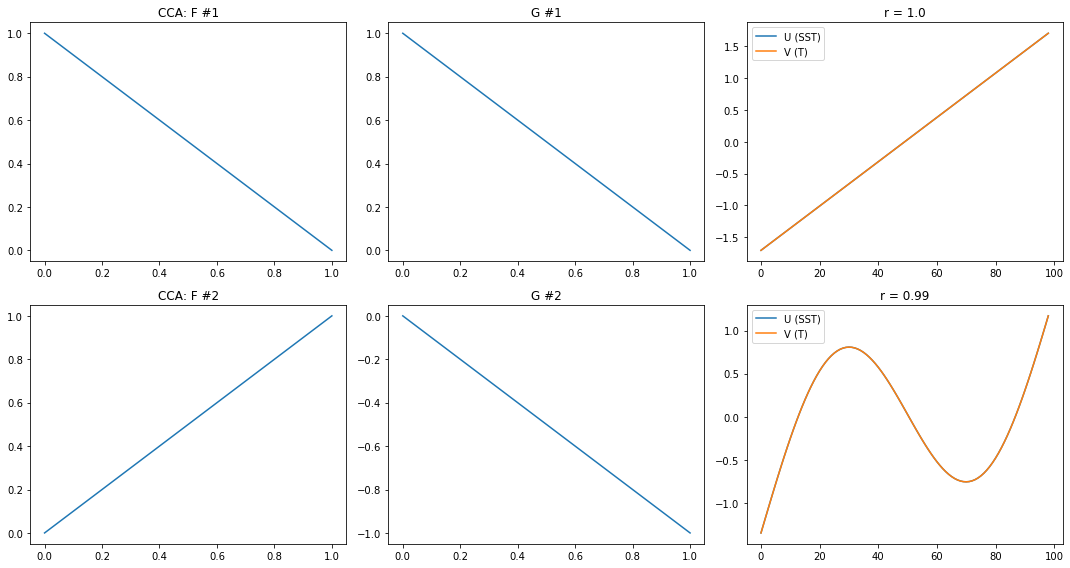

In [13]:
#plot first n CCA modes of SST (F), T (G), and their loadings (u,v)

n = 2

cmap = 'RdBu_r'

plt.figure(figsize=(15,8))

for mode in range(n):

    plt.subplot(2,3,3*mode+1)
    plt.plot(A[:,mode])
    plt.title('CCA: F #' + str(mode+1))

    plt.subplot(2,3,3*mode+2)
    plt.plot(B[:,mode])
    plt.title('G #' + str(mode+1))

    plt.subplot(2,3,3*mode+3)
    plt.plot(U[:,mode])
    plt.plot(V[:,mode])
    plt.legend(['U (SST)','V (T)'])
    plt.title('r = ' + str(r[mode][0,1])[:4])

plt.tight_layout()
plt.show()